<a href="https://colab.research.google.com/github/EnisBerk/speech_audio_understanding/blob/master/notebooks/vis_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# GLOBAL parameters
# first run of notebook ?
first_run=True
# do we need to download data files ? True=Yes
data_download=True

In [7]:
if first_run==True:
  !pip install numpy scipy
  !pip install MulticoreTSNE

#   !pip install resampy tensorflow six
#   !pip install pysoundfile 
#   #from mp3 to wav
#   !pip install pydub



  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [3]:
if first_run==True:
  import os
  import numpy as np
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt
#   from MulticoreTSNE import MulticoreTSNE as TSNE

  import plotly.graph_objs as go
  from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
  import IPython

#   from google.colab import files as fs

init_notebook_mode(connected=True)


IndexError: list index out of range

In [0]:
# To be able to use plotly with google colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
# %conda env list
import IPython
print(IPython.sys_info())

{'commit_hash': u'b573435',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython',
 'ipython_version': '4.1.2',
 'os_name': 'posix',
 'platform': 'Darwin-17.7.0-x86_64-i386-64bit',
 'sys_executable': '/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python',
 'sys_platform': 'darwin',
 'sys_version': '2.7.8 (v2.7.8:ee879c0ffa11, Jun 29 2014, 21:07:35) \n[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]'}


In [0]:
# login to download private datasets
if first_run==True:
  from google.colab import auth
  auth.authenticate_user()


In [11]:
if data_download==True:
  # this dataset is private
  !gsutil cp gs://deep_learning_enis/speech_audio_understanding/data.tar.gz ./
  !tar xzf data.tar.gz

Copying gs://deep_learning_enis/speech_audio_understanding/data.tar.gz...
- [1 files][  1.1 GiB/  1.1 GiB]   68.8 MiB/s                                   
Operation completed over 1 objects/1.1 GiB.                                      


In [12]:
if data_download==True:
    # embeddings of previous dataset
  !gsutil cp gs://deep_learning_enis/speech_audio_understanding/embeddings3.npy ./
  !gsutil cp gs://deep_learning_enis/speech_audio_understanding/postprocessed3.npy ./
  !gsutil cp gs://deep_learning_enis/speech_audio_understanding/data_file_indexes3.npy ./


Copying gs://deep_learning_enis/speech_audio_understanding/embeddings3.npy...
\ [1 files][ 46.9 MiB/ 46.9 MiB]                                                
Operation completed over 1 objects/46.9 MiB.                                     
Copying gs://deep_learning_enis/speech_audio_understanding/postprocessed3.npy...
\ [1 files][ 46.9 MiB/ 46.9 MiB]                                                
Operation completed over 1 objects/46.9 MiB.                                     
Copying gs://deep_learning_enis/speech_audio_understanding/data_file_indexes3.npy...
/ [1 files][973.2 KiB/973.2 KiB]                                                
Operation completed over 1 objects/973.2 KiB.                                    


In [0]:
# Load embeddings of datasets
embeddings=np.load('embeddings3.npy')
postprocessed=np.load('postprocessed3.npy')
data_file_indexes=np.load('data_file_indexes3.npy')
#get dict from numpy array
data_file_indexes=data_file_indexes[()]

"""
data_file_indexes:
{'CLVL5_20160621_074419_0120m_00s__0180m_00s_06m_00s__08m_00s_00m_00s__00m_10s.wav': (0,
  10),
 'CLVL5_20160621_074419_0120m_00s__0180m_00s_06m_00s__08m_00s_00m_10s__00m_20s.wav': (10,
  20),
 'CLVL5_20160621_074419_0120m_00s__0180m_00s_06m_00s__08m_00s_00m_20s__00m_30s.wav': (20,
  30),
 'CLVL5_20160621_074419_0120m_00s__0180m_00s_06m_00s__08m_00s_00m_30s__00m_40s.wav': (30,
  40),
  """


(96000, 128)

In [0]:
# seperate 1 second
# postprocessed=np.mean(postprocessed.reshape(10,-1,128),axis=0)

# 10 second all together
postprocessed=postprocessed.reshape(9600,1280)

postprocessed.shape

(9600, 1280)

In [0]:
#multiprocesser version of TSNE 
tsne = TSNE(n_jobs=2)
postprocessed_TSNE = tsne.fit_transform(postprocessed)

In [0]:
# this is slow version
# postprocessed_TSNE = TSNE(n_components=2).fit_transform(postprocessed)
# plt.plot(postprocessed_TSNE[:,0],postprocessed_TSNE[:,1],'bo')

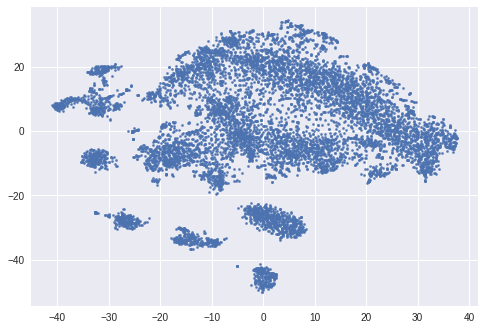

In [0]:
plt.scatter(postprocessed_TSNE[:,0],postprocessed_TSNE[:,1],s=5)

In [0]:
# This is wrong strategy: TODO use dictionary directly
# mp3_data_files=sorted(list(data_file_indexes.keys()))

In [0]:
# site names keeps site name of each corresponding file from mp3_data_files list
site_names=[]
for name in mp3_data_files:
  file_id=name
  name=name.split("_")
#   if len(name)!=18:
#     print(name)
  site_name=name[0]
  site_names.append(site_name)
  date=name[1]
  year=date[0:4]
  month=date[4:6]
  day=date[6:8]
  
  site_id=name[2]

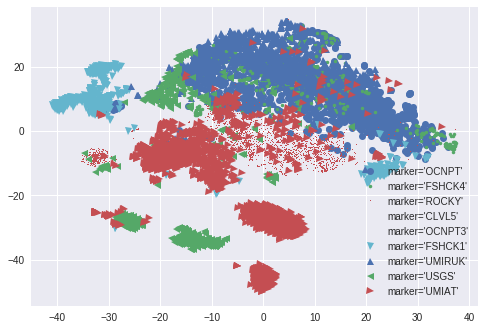

In [0]:
# rng = np.random.RandomState(0)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_dict={}
data_dict={}
data_dict_file_names={}
site_names_set=set(site_names)

for i,site_name in enumerate(site_names_set):
  marker_dict[site_name]=markers[i] 
  data_dict[site_name]=[[],[]]
  data_dict_file_names[site_name]=[]

# Go through all data add it to corresponding class (sites)
for i,site_name in enumerate(site_names):
  data_dict[site_name][0].append(postprocessed_TSNE[i,0])
  data_dict[site_name][1].append(postprocessed_TSNE[i,1])
  data_dict_file_names[site_name].append(mp3_data_files[i])

for site_name in data_dict.keys():
  plt.plot(data_dict[site_name][0], data_dict[site_name][1], marker_dict[site_name],
    label="marker='{0}'".format(site_name))

plt.legend(numpoints=1)
# plt.ylim(50, 100);


In [0]:
postprocessed_TSNE

In [0]:
configure_plotly_browser_state()
N = 500

trace0 = go.Scatter(
#     x = np.random.randn(N),
#     y = np.random.randn(N)+2,
    x=data_dict['FSHCK1'][0],
    y=data_dict['FSHCK1'][1],
    name = 'Above',
    mode = 'markers',
    text=data_dict_file_names['FSHCK1'],
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
#     x = np.random.randn(N),
#     y = np.random.randn(N)-2,
    x=data_dict['USGS'][0],
    y=data_dict['USGS'][1],
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Styled Scatter',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [0]:
# filter by site name and x,y values of T-sne and play songs in the "limits" index range
site_name='USGS'
x_limit=(-40,-28)
y_limit=(-20,0)
limits=range(10)

limit=-1
for i,data in enumerate(zip(data_dict[site_name][0],data_dict[site_name][1])):
  if (x_limit[0]<data[0] and data[0]<x_limit[1]) and (y_limit[0]<data[1] and data[1]<y_limit[1]):
    limit+=1
    if (limit in limits):
      print(data_dict_file_names[site_name][i])
      filename=data_dict_file_names[site_name][i][:-4]+".mp3"
      filename="./data/split_00:10/"+filename
      fs.download(filename)
      IPython.display.display(IPython.display.Audio(filename))
      

USGS_20160613_234225_0660m_00s__0720m_00s_40m_00s__42m_00s_01m_50s__01m_59s_95h.wav


USGS_20160613_234225_0900m_00s__0960m_00s_02m_00s__04m_00s_00m_10s__00m_20s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_02m_00s__04m_00s_00m_20s__00m_30s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_08m_00s__10m_00s_01m_00s__01m_10s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_08m_00s__10m_00s_01m_10s__01m_20s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_08m_00s__10m_00s_01m_20s__01m_30s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_08m_00s__10m_00s_01m_30s__01m_40s.wav


USGS_20160613_234225_0900m_00s__0960m_00s_08m_00s__10m_00s_01m_50s__01m_59s_95h.wav


USGS_20160613_234225_2820m_00s__2880m_00s_34m_00s__36m_00s_00m_10s__00m_20s.wav


USGS_20160613_234225_2820m_00s__2880m_00s_34m_00s__36m_00s_00m_20s__00m_30s.wav


In [0]:
# rather than combining vectors, taking an average 
embeddings_avg=np.mean(embeddings.reshape(10,-1,128),axis=0)

In [0]:
# check if there is any files that are shorter than 10 second
for key,(start,end) in data_file_indexes.items():
  if end-start!=10:
    print("CAUTION ",key," had more or less than 10 seconds ",end,start)

In [0]:
# apply T-sne agaain
embeddings_avg_TSNE = TSNE(n_components=2).fit_transform(embeddings_avg)
print(embeddings_avg_TSNE.shape)

(9600, 2)


In [0]:
# followings are attempts to visualise the data

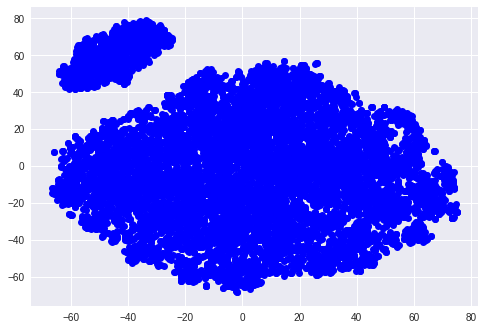

In [0]:
plt.plot(embeddings_avg_TSNE[:,0],embeddings_avg_TSNE[:,1],'bo')

In [0]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)


In [0]:
for i in range(len(site_names)):
trace = go.Scatter(
    x = embeddings_avg_TSNE[i,0],
    y = embeddings_avg_TSNE[i,1],
    mode = 'markers'
    marker=(text=site_names[i])
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')


IndentationError: ignored

In [0]:
l= []
y= []
#data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
# Setting colors for plot.
# N= 53
# c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(len(site_names)):
    trace0= go.Scatter(
        x = (embeddings_avg_TSNE[i,0],),
        y = (embeddings_avg_TSNE[i,1],),
        mode= 'markers',
#         marker= dict(size= 14,
#                     line= dict(width=1),
#                     opacity= 0.3
#                    ),
        text= site_names[i]) # The hover text goes here... 
    l.append(trace0);

In [0]:
fig= go.Figure(data=l)
plotly.offline.plot(fig)

'file:///content/temp-plot.html'

In [0]:
import IPython.display as ipd
ipd.Audio('./data/split_00:10/UMIAT_20130725_210243_1200m_00s__1260m_00s_40m_00s__42m_00s_01m_30s__01m_40s.mp3')

In [0]:
import IPython

for i,name in enumerate(mp3_data_files):
  if embeddings_avg_TSNE[i,1]>70:
    IPython.display.display(ipd.Audio('./data/split_00:10/'+name))
    print('./data/split_00:10/'+name)
  

In [0]:
site_names_set

{'CLVL5',
 'FSHCK1',
 'FSHCK4',
 'OCNPT',
 'OCNPT3',
 'ROCKY',
 'UMIAT',
 'UMIRUK',
 'USGS'}

In [0]:
# postprocessed_TSNE = TSNE(n_components=2).fit_transform(postprocessed)


In [0]:
objects=[]
performance=[]
for name,list_of_data in data_dict.items():
  print("{} {}".format(name,len(list_of_data[0])))
  objects.append(name)
  performance.append(len(list_of_data[0]))
  
  

FSHCK4 384
UMIAT 2124
ROCKY 1716
UMIRUK 1008
OCNPT3 948
USGS 744
CLVL5 240
FSHCK1 636
OCNPT 1800


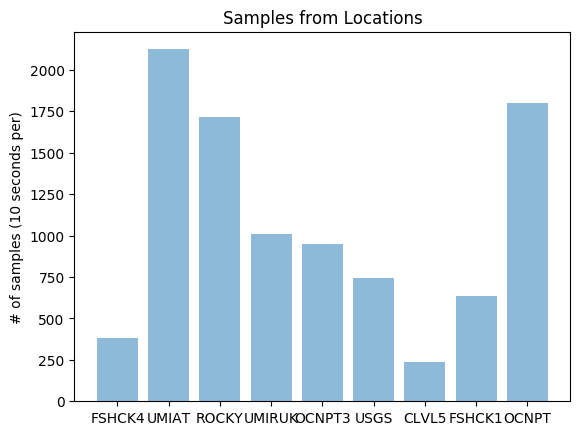

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# of samples (10 seconds per)')
plt.title('Samples from Locations')
 
plt.show()

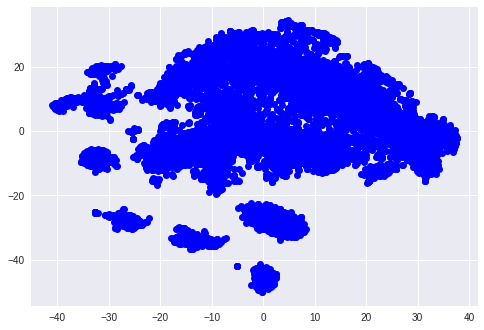

In [0]:
plt.plot(postprocessed_TSNE[:,0],postprocessed_TSNE[:,1],'bo')